# EDA - Bivariate Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path
from scipy.stats import chi2_contingency, pointbiserialr

In [2]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [3]:
datasets = Path("../datasets")
full_df = pd.read_csv(datasets / "school_clean.csv")
full_df.head()

,Student_ID,Undergrad_Degree,Undergrad_Grade,MBA_Grade,Work_Experience,Employability_Before,Employability_After,Status,Annual_Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


Since the goal is to determine which students have the highest chance of being placed, the project will focus on data that would be available during admissions. 

The columns are ['Undergrad_Degree', 'Undergrad_Grade', 'Work_Experience', 'Employability_Before', 'Status'].

In [8]:
pre_admission_columns = [
    "Undergrad_Degree",
    "Undergrad_Grade",
    "Work_Experience",
    "Employability_Before",
    "Status",
]
df = full_df[pre_admission_columns]
df.head()

,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status
0,Business,68.4,No,252.0,Placed
1,Business,62.1,No,423.0,Not Placed
2,Computer Science,70.2,Yes,101.0,Placed
3,Engineering,75.1,No,288.0,Not Placed
4,Finance,60.9,No,248.0,Not Placed


In [28]:
# Create encoded column for status
df.loc[:, "Status_enc"] = df.Status.map({"Placed": 1, "Not Placed": 0})
df.head()

,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status,Status_enc
0,Business,68.4,No,252.0,Placed,1
1,Business,62.1,No,423.0,Not Placed,0
2,Computer Science,70.2,Yes,101.0,Placed,1
3,Engineering,75.1,No,288.0,Not Placed,0
4,Finance,60.9,No,248.0,Not Placed,0


In [9]:
# Set global color palette
global_color = "colorblind"
# Set global color for Seaborn
sns.set_palette(global_color)
# Set global color palette for Matplotlib
colors = sns.color_palette(global_color)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

## Box Plot Comparison of Continuous Variables to Status

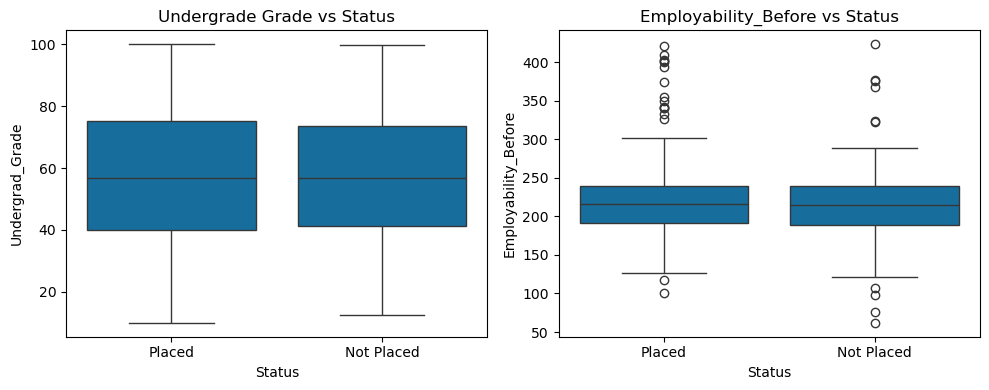

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x="Status", y="Undergrad_Grade", data=df, ax=ax[0])
ax[0].set_title("Undergrade Grade vs Status")

sns.boxplot(x="Status", y="Employability_Before", data=df, ax=ax[1])
ax[1].set_title("Employability_Before vs Status")

plt.tight_layout()
plt.show()

In [31]:
correlation, p_value = pointbiserialr(df["Employability_Before"], df["Status_enc"])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.04211158242567158
P-value: 0.1448641257015899


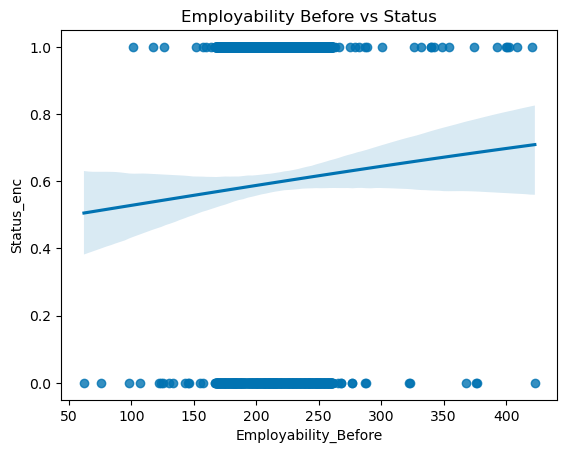

In [32]:
sns.regplot(x="Employability_Before", y="Status_enc", data=df, logistic=True)
plt.title("Employability Before vs Status")
plt.show()

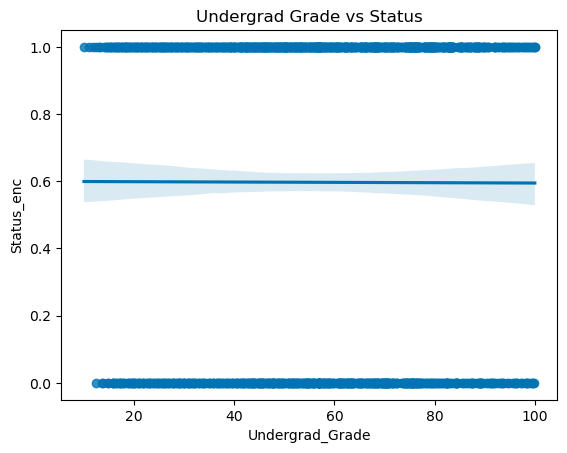

In [34]:
sns.regplot(x="Undergrad_Grade", y="Status_enc", data=df, logistic=True)
plt.title("Undergrad Grade vs Status")
plt.show()

## Work Experience vs Status

In [18]:
undergrad_contingency = pd.crosstab(df["Undergrad_Degree"], df["Status"])
print(undergrad_contingency)

chi2, p, dof, expected = chi2_contingency(undergrad_contingency)
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")

Status            Not Placed  Placed
Undergrad_Degree                    
Art                      224       6
Business                  17     240
Computer Science           9     231
Engineering              230       9
Finance                    4     230
Chi-Square value: 1021.4286957111007
P-value: 8.102228587883412e-220


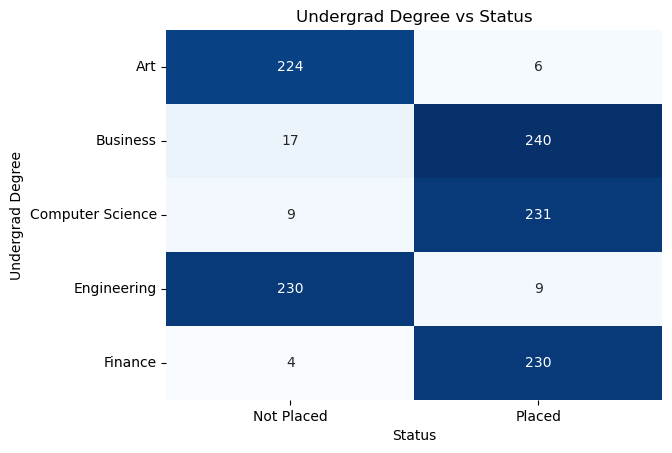

In [19]:
sns.heatmap(undergrad_contingency, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.title("Undergrad Degree vs Status")
plt.xlabel("Status")
plt.ylabel("Undergrad Degree")
plt.show()

In [20]:
workexperience_contingency = pd.crosstab(df["Work_Experience"], df["Status"])
print(workexperience_contingency)

chi2, p, dof, expected = chi2_contingency(workexperience_contingency)
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")

Status           Not Placed  Placed
Work_Experience                    
No                      478     588
Yes                       6     128
Chi-Square value: 78.91571614874363
P-value: 6.481706163814314e-19


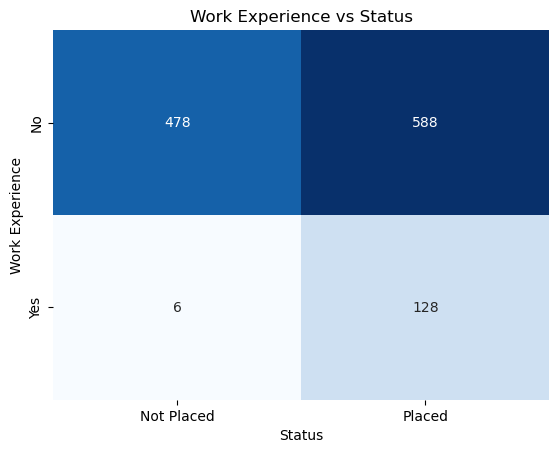

In [21]:
sns.heatmap(workexperience_contingency, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.title("Work Experience vs Status")
plt.xlabel("Status")
plt.ylabel("Work Experience")
plt.show()

## Work Experience vs Status

In [ ]:
crosstab = pd.crosstab(df["Status"], df["Work Experience"])
display(crosstab)

In [ ]:
plt.figure(figsize=(8, 5))

# Plot the bars manually for 'No' and 'Yes' work experience
bars1 = plt.bar(
    crosstab.index, crosstab["No"], label="No Work Experience", color="#1f77b4"
)
bars2 = plt.bar(
    crosstab.index,
    crosstab["Yes"],
    bottom=crosstab["No"],
    label="Yes Work Experience",
    color="#ff7f0e",
)

# Add number counts on top of each bar for 'No Work Experience'
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height - 30,
        "%d" % int(height),
        ha="center",
        color="white",
        fontweight="bold",
    )

# Add number counts on top of each bar for 'Yes Work Experience'
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 10,
        "%d" % int(height),
        ha="center",
        color="black",
        fontweight="bold",
    )

# Add labels and title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Work Experience vs Status After Graduation")
plt.legend()

# Show the plot
plt.show()

Chart shows that students were more employable after graduation. 